<a href="https://colab.research.google.com/github/jfcasasp/Machine-Learning/blob/main/Clasificador%20de%20d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 Aplicaciones del aprendizaje de máquina para actuaría y finanzas
## Jose Fidel Casas Porras
### Clasificación y generación de dígitos

#### Librerías y carga del conjunto de datos

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [2]:
data = datasets.fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Las imágenes y sus etiquetas se extraen en un dataframe. Cada imagen tiene 784 columnas y hay 70,000 imágenes de tamaño 28x28 píxeles. Las etiquetas corresponden a los números del 0 al 9.

Es relevante destacar que los valores de los píxeles en MNIST son en escala de grises, no binarios. Van de 0 a 255, donde 0 es negro, 255 es blanco y los valores intermedios representan diferentes tonos de gris.

In [3]:
images = data.data
labels = data.target

In [4]:
images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Así se verían las imágenes de los dígitos

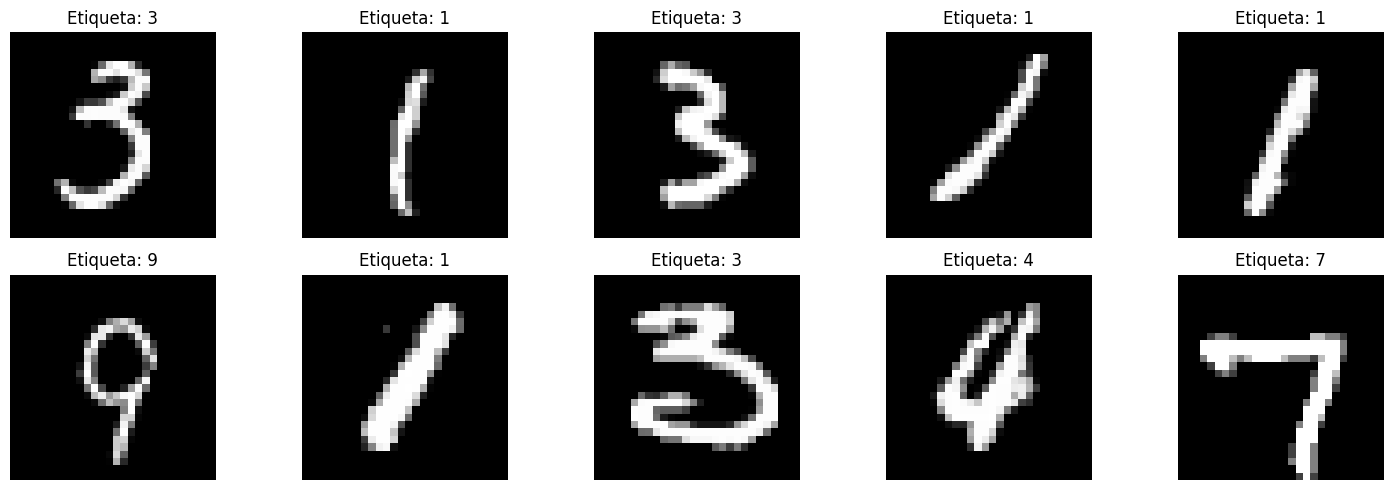

In [8]:
indices= random.sample(range(len(images)), 10)

# Crear una figura con un tamaño específico
plt.figure(figsize=(15, 5))

# Iterar sobre los índices aleatorios y mostrar las imágenes correspondientes
for i, idx_new in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images.iloc[idx_new].values.reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {labels[idx_new]}")
    plt.axis('off')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

Dividimos sobre 255 para que cada valor de dígito esté entre 0 y 1

In [9]:
images_normalized = images/255

### Selección del conjunto de datos

Dividimos los datos entre train y test

In [11]:
n= 15000
seed= 2023

# División del conjunto de datos original
X_new, _, y_new, _ = train_test_split(images_normalized, labels, test_size=n, stratify=labels, random_state=seed)

# División adicional en conjuntos de entrenamiento y validación
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=seed)

## Modelo


In [12]:
label_counts = y_train_new.value_counts()

total_examples = len(y_train_new)
prior_probabilities = label_counts / total_examples

prior_df = pd.DataFrame(prior_probabilities).reset_index()
prior_df.columns = ['Label', 'Prior Probability']

prior_df

,Label,Prior Probability
0,1,0.112523
1,7,0.104182
2,3,0.102023
3,2,0.099864
4,9,0.099409
5,0,0.098614
6,6,0.098227
7,4,0.097500
8,8,0.097477
9,5,0.090182


In [13]:
def calculate_pixel_proportions(df_normalized, labels, umbral):
    unique_labels = np.unique(labels)
    pixel_proportions = {label: np.zeros((28, 28)) for label in unique_labels}

    for label in unique_labels:
        images_label = df_normalized[labels == label].values
        pixel_proportions[label] = np.mean(images_label > umbral, axis=0)

    proportions_df = pd.DataFrame.from_dict(pixel_proportions, orient='index')

    return proportions_df



In [14]:
umbral = 0.40
proportions_2 = calculate_pixel_proportions(df_normalized = X_train_new, labels = y_train_new, umbral = umbral)

proportions_2

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006763,0.003054,0.000873,0.000218,0.000436,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001143,0.001143,0.000686,0.000229,0.000000,0.0,0.0,0.0,0.0,0.0


## Implementeación y evaluación del modelo


In [15]:
X_val_binarized = X_val_new > umbral

predictions = []

for index, image in X_val_binarized.iterrows():
    posteriors = {}

    for label in np.unique(labels):
        likelihood = proportions_2.loc[label].values * image + (1 - proportions_2.loc[label].values) * (1 - image)
        posterior = np.prod(likelihood) * prior_probabilities[label]
        posteriors[label] = posterior

    predicted_label = max(posteriors, key=posteriors.get)
    predictions.append(predicted_label)

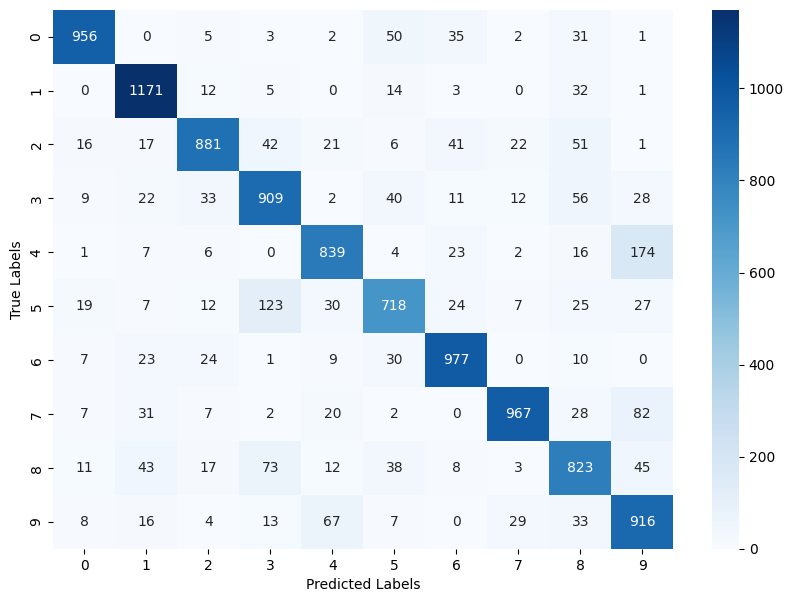

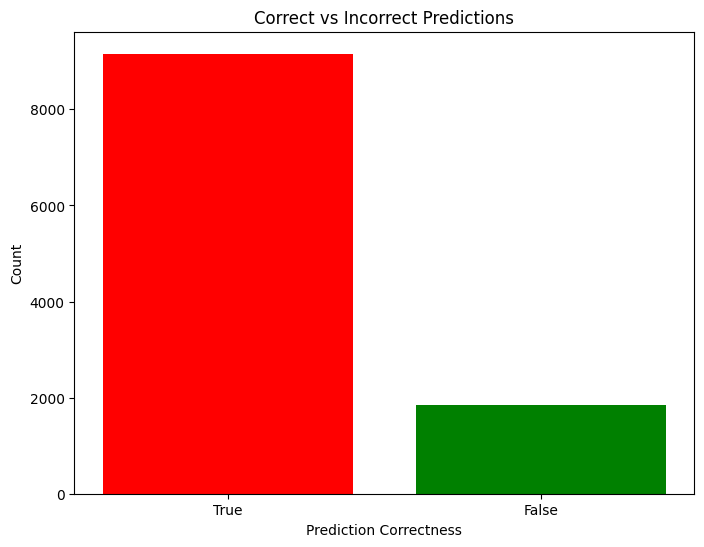

In [19]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val_new, predictions)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

correct_predictions = np.equal(predictions, y_val_new)
correct_counts = pd.Series(correct_predictions).value_counts()

plt.figure(figsize=(8, 6))
plt.bar(correct_counts.index.astype(str), correct_counts.values, color=['red', 'green'])
plt.xlabel('Prediction Correctness')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()


## Generación de dígitos

Para generar un nuevo dígito basado en el modelo Naive Bayes:

1. Se elige un dígito específico del conjunto de entrenamiento.
2. Se utilizan las probabilidades condicionales $P(\textbf{x}|C_k)$ previamente calculadas para ese dígito durante el entrenamiento.
3. Para cada píxel de la nueva imagen:
   - Se genera un número aleatorio entre 0 y 1.
   - Si el número aleatorio es menor que la probabilidad condicional $P(\textbf{x}|C_k)$ para ese píxel, el píxel se enciende (se establece en 1).
   - Si el número aleatorio es mayor o igual que la probabilidad condicional, el píxel se apaga (se establece en 0).

Esto implica que si la probabilidad condicional es alta, hay una alta probabilidad de que el píxel se encienda en la nueva imagen, y si es baja, hay una alta probabilidad de que se apague.


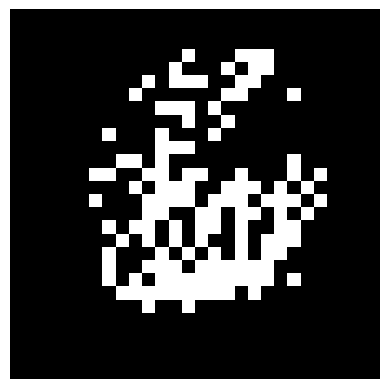

In [25]:
digito = '9'
probs = proportions_2.loc[digit].values.reshape(28, 28)  # Redimensionar el array
probs_normalized = probs / np.max(probs)
synthetic_image = np.random.rand(28, 28) < probs_normalized  # Comparar el array redimensionado

plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')
plt.show()

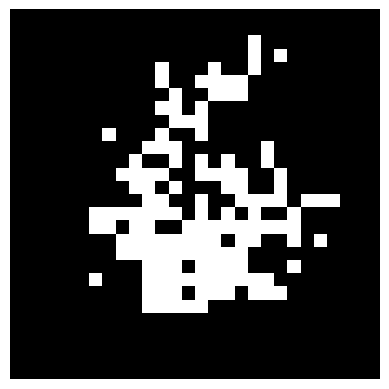

In [24]:
digito = '8'
probs = proportions_2.loc[digit].values.reshape(28, 28)  # Redimensionar el array
probs_normalized = probs / np.max(probs)
synthetic_image = np.random.rand(28, 28) < probs_normalized  # Comparar el array redimensionado

plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')
plt.show()

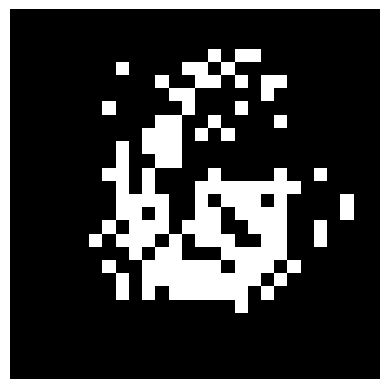

In [26]:
digito = '1'
probs = proportions_2.loc[digit].values.reshape(28, 28)  # Redimensionar el array
probs_normalized = probs / np.max(probs)
synthetic_image = np.random.rand(28, 28) < probs_normalized  # Comparar el array redimensionado

plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')
plt.show()

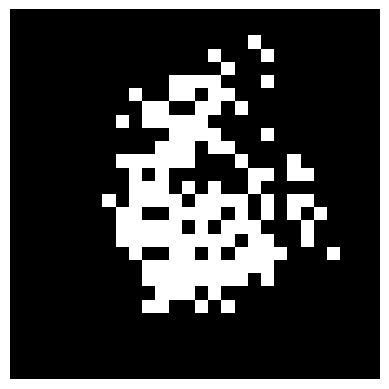

In [27]:
digito = '3'
probs = proportions_2.loc[digit].values.reshape(28, 28)  # Redimensionar el array
probs_normalized = probs / np.max(probs)
synthetic_image = np.random.rand(28, 28) < probs_normalized  # Comparar el array redimensionado

plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')
plt.show()

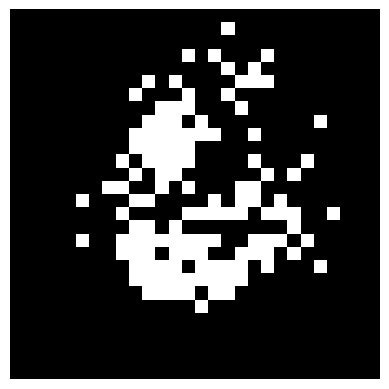

In [28]:
digito = '6'
probs = proportions_2.loc[digit].values.reshape(28, 28)  # Redimensionar el array
probs_normalized = probs / np.max(probs)
synthetic_image = np.random.rand(28, 28) < probs_normalized  # Comparar el array redimensionado

plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')
plt.show()